In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Advertising.csv')

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.drop(['Unnamed: 0'], axis =1 , inplace=True)

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Univariate Analysis

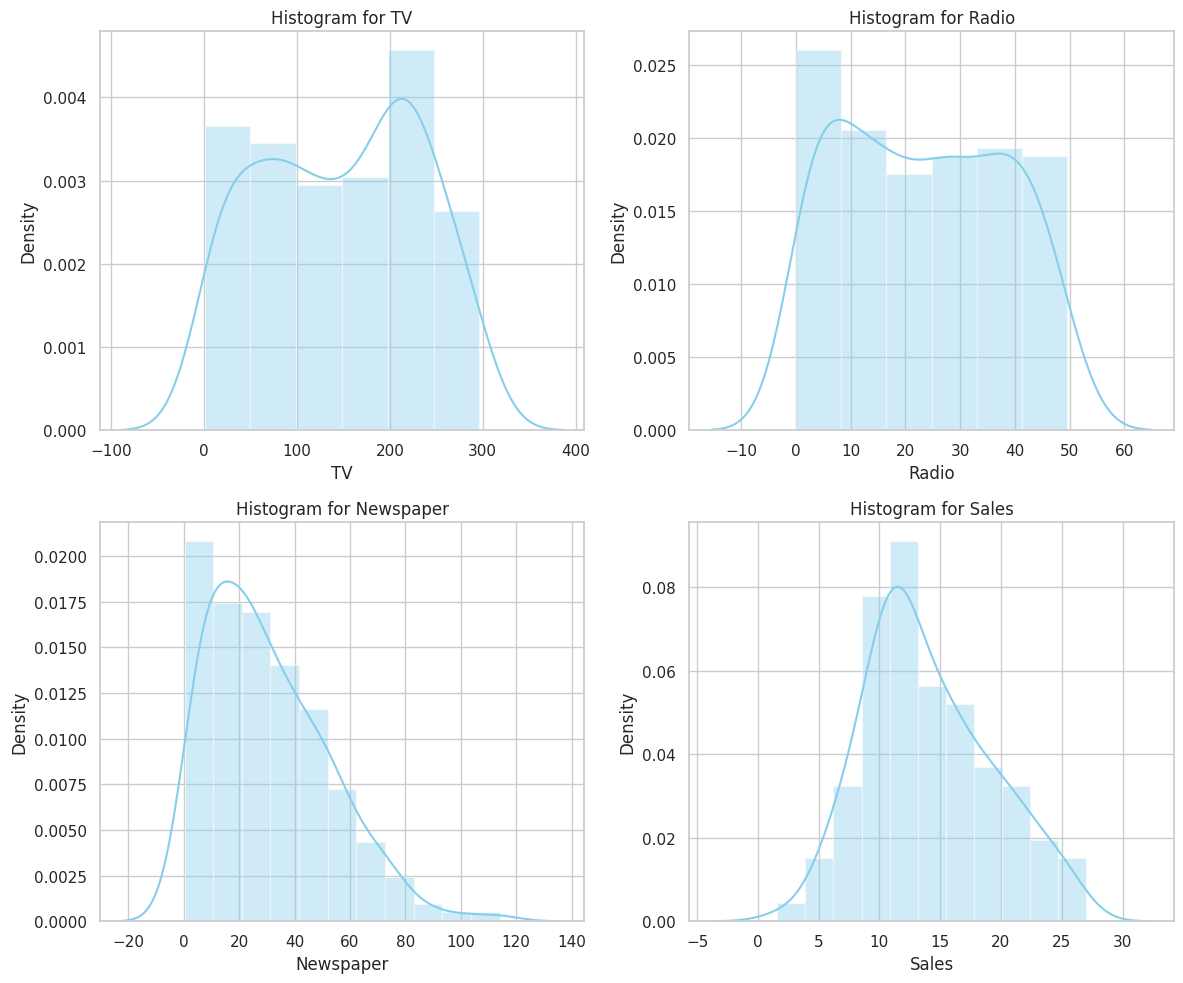

In [ ]:
sns.set(style='whitegrid')
columns_to_plot = data.columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
  sns.distplot(data[column], kde=True, ax=axes[i], color='skyblue')
  axes[i].set_title(f'Histogram for {column}')

plt.tight_layout()
plt.show()

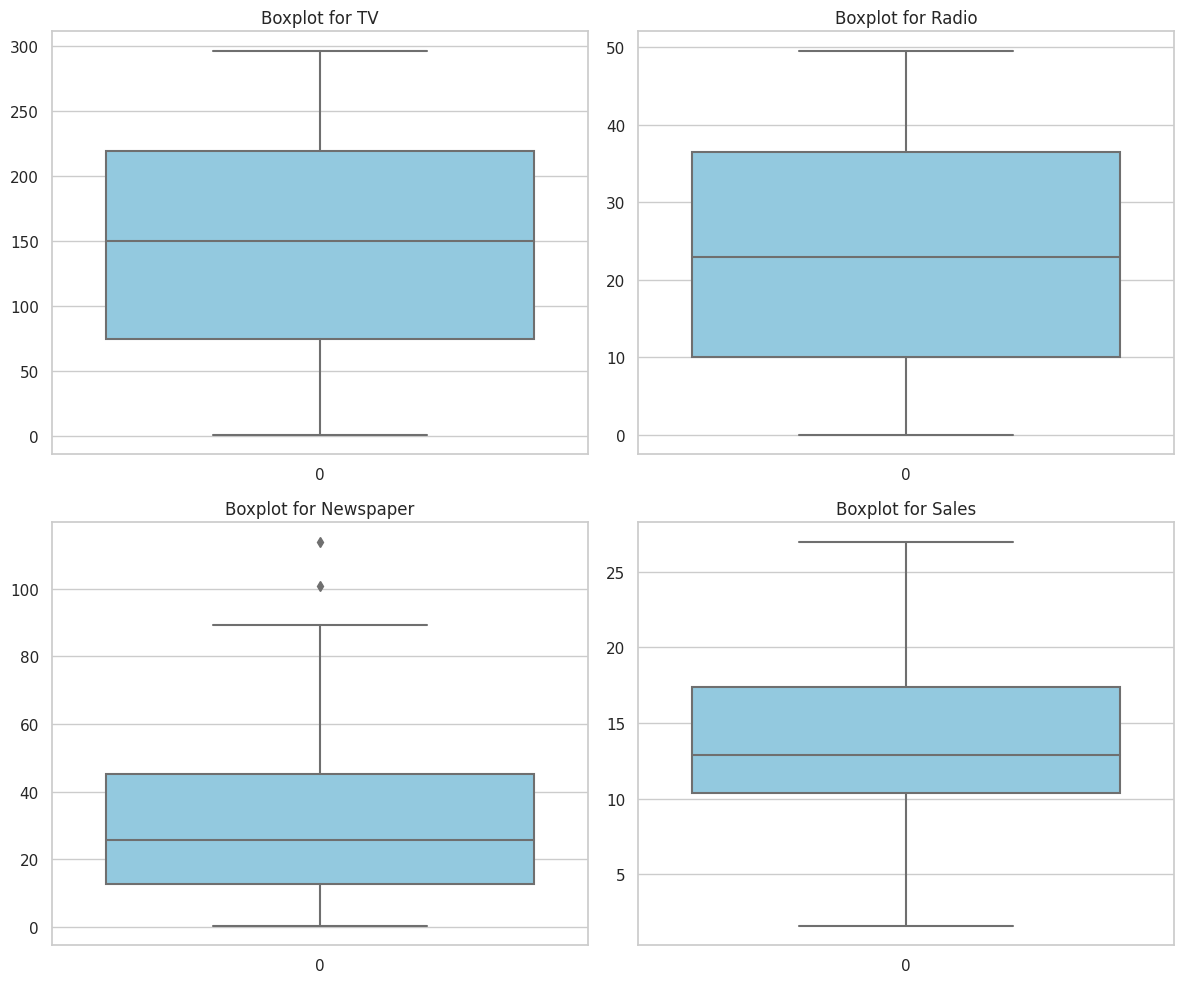

In [ ]:
sns.set(style='whitegrid')
columns_to_plot = data.columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,10))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
  sns.boxplot(data[column], ax=axes[i], color='skyblue')
  axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

**As there are outliers for column Newspaper so we need to handle it.**

In [ ]:
# As Newspaper column is right skewed so will use IQR to handle outliers
Q1 = data['Newspaper'].quantile(.25)
Q3 = data['Newspaper'].quantile(.75)
IQR = Q3 - Q1
print('Q1 : ',Q1)
print('Q3 : ',Q3)
print('IQR : ',IQR)

# Find the upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit : ',lower_limit)
print('Upper Limit : ',upper_limit)

# Find the values that are above the upper limit
print(data.loc[data['Newspaper'] > upper_limit])

# Since data is not normal we will replace the outliers with median
data.loc[data['Newspaper'] > upper_limit, 'Newspaper'] = data['Newspaper'].median()

Q1 :  12.75
Q3 :  45.1
IQR :  32.35
Lower Limit :  -35.775000000000006
Upper Limit :  93.625
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


<Axes: >

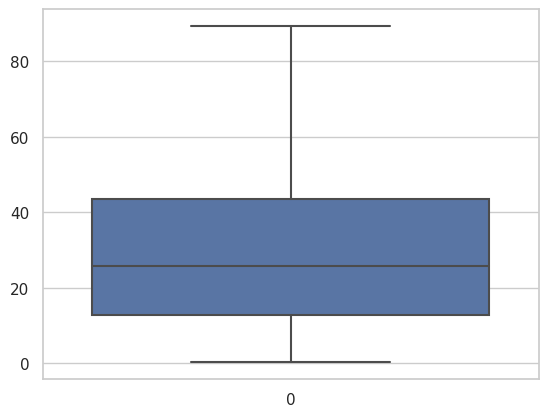

In [ ]:
sns.boxplot(data['Newspaper'])

**Using above outlier removing technique the outliers have been removed using IQR**

<Axes: >

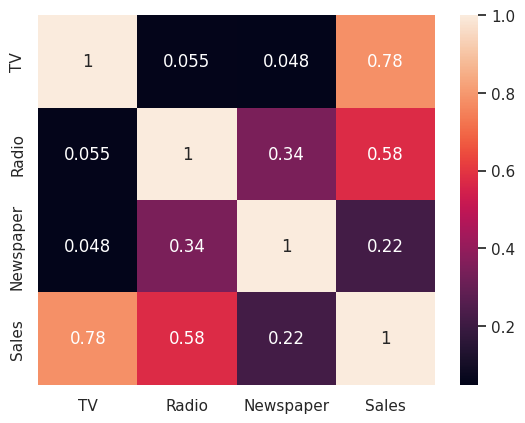

In [ ]:
sns.heatmap(data.corr(), annot=True)

# Trainig the model

## Splitting data

In [ ]:
x = data.drop('Sales', axis=1)
y = data['Sales']

## Splitting data for training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
# Shapes with respect each data
print('x_train : ',x_train.shape)
print('x_test  : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test  : ',y_test.shape)

x_train :  (140, 3)
x_test  :  (60, 3)
y_train :  (140,)
y_test  :  (60,)


## Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=model.predict(x_test)
y_pred


array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [85]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

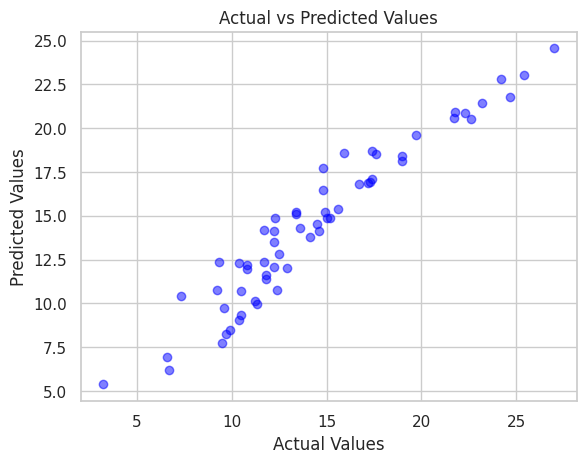

In [95]:
# Assuming y_test and y_pred are your actual and predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [86]:
print('Slope : ',model.coef_)
print('Intercept : ',model.intercept_)


Slope :  [0.04539939 0.17757031 0.00502354]
Intercept :  3.090172035290914


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
r2_score(y_test, y_pred)

0.9134809669573122

In [96]:
MSE = mean_squared_error(y_test, y_pred)
MSE

2.204438630669019

In [97]:
RMSE = np.sqrt(MSE)
RMSE

1.4847352055733773